# Plotting

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Basic plotting functions:

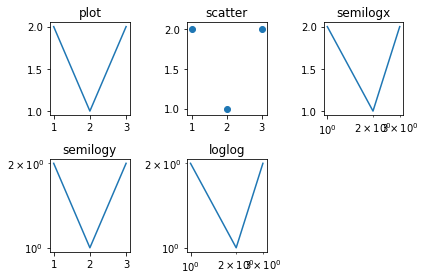

In [2]:
plotfuncs = [plt.plot, 
             plt.scatter, 
             plt.semilogx, 
             plt.semilogy, 
             plt.loglog]

for i, func in enumerate(plotfuncs, 1):
    plt.subplot(2, 3, i)
    func([1, 2, 3], [2, 1, 2])
    plt.title(func.__name__)
plt.tight_layout()

# Numeric 

In [3]:
import numpy
import scipy

In [4]:
a = numpy.array([1, 2, 3])

# SymPy

## Imports

In [5]:
import sympy
sympy.init_printing()

In [6]:
s = sympy.Symbol('s')
tau, K_c = sympy.symbols('tau K_c', positive=True) # we can use real=True or complex=True for other kinds of variables

Example controller and system

In [7]:
G_c = K_c*((tau*s + 1) / (tau*s))
GvGpGm = 5 / ((10*s + 1)**2)

Simplification

In [8]:
chareq = (GvGpGm*G_c + 1).simplify()
chareq *= sympy.denom(chareq.together())

Convert to polynomial in s

In [9]:
chareq = sympy.poly(chareq.together(), s)

Calculate the Routh Array

In [10]:
def routh(p):
    """ Construct the Routh-Hurwitz array given a polynomial in s"""
    coefficients = p.all_coeffs()
    N = len(coefficients)
    M = sympy.zeros(N, (N+1)//2 + 1)

    r1 = coefficients[0::2]
    r2 = coefficients[1::2]
    M[0, :len(r1)] = [r1]
    M[1, :len(r2)] = [r2]
    for i in range(2, N):
        for j in range(N//2):
            S = M[[i-2, i-1], [0, j+1]]
            M[i, j] = sympy.simplify(-S.det()/M[i-1,0])
    return M[:, :-1]

In [11]:
routh(chareq)

⎡         100⋅τ           5⋅K_c⋅τ + τ⎤
⎢                                    ⎥
⎢         20⋅τ               5⋅K_c   ⎥
⎢                                    ⎥
⎢-25⋅K_c + τ⋅(5⋅K_c + 1)       0     ⎥
⎢                                    ⎥
⎣         5⋅K_c                0     ⎦